In [1]:
#This shows how to get information about tiles
from select_CItiles import *


In [2]:
#Decide some ra,dec range you want and the magnitude threshold for deciding the minimum brightness for a star per CCD
#then run get_tile_info
#If the version of the tile files has changed from 6, make to include that
#This searches to find tiles centered within ra 200,220; dec 30,40, and reports the total number of stars if there is at least
#one brighter than G=18 on each ccd
get_tile_info(200,220,30,40,magtest=18,version=6)

58675 got target info for each camera for tile 58675 centered on 205.77 34.35
1 STARS ON ALL 5 CCDS PASSING MAG TEST for TILE 58675 centered on 205.77 34.35
94 stars on center camera
brightest is 8.0123
60 stars on north camera
brightest is 9.6763
75 stars on east camera
brightest is 11.5538
70 stars on south camera
brightest is 13.58
57 stars on west camera
brightest is 11.4847
58676 got target info for each camera for tile 58676 centered on 203.64 39.47
1 STARS ON ALL 5 CCDS PASSING MAG TEST for TILE 58676 centered on 203.64 39.47
93 stars on center camera
brightest is 12.6023
67 stars on north camera
brightest is 13.5585
72 stars on east camera
brightest is 9.69152
59 stars on south camera
brightest is 11.4714
53 stars on west camera
brightest is 12.2729
58682 got target info for each camera for tile 58682 centered on 211.96 35.91
1 STARS ON ALL 5 CCDS PASSING MAG TEST for TILE 58682 centered on 211.96 35.91
99 stars on center camera
brightest is 10.9327
80 stars on north camera
bri

True

In [3]:
#v6 tile files are 4x as big now. It is therefore reasonable to compare with v4 to see what is really expected on the tile
get_tile_info(200,220,30,40,magtest=18,version=4)

58675 got target info for each camera for tile 58675 centered on 205.77 34.35
1 STARS ON ALL 5 CCDS PASSING MAG TEST for TILE 58675 centered on 205.77 34.35
4 stars on center camera
brightest is 9.59163
3 stars on north camera
brightest is 15.8283
2 stars on east camera
brightest is 14.3369
8 stars on south camera
brightest is 13.887
8 stars on west camera
brightest is 13.2277
58676 got target info for each camera for tile 58676 centered on 203.64 39.47
1 STARS ON ALL 5 CCDS PASSING MAG TEST for TILE 58676 centered on 203.64 39.47
6 stars on center camera
brightest is 14.8293
5 stars on north camera
brightest is 16.4806
5 stars on east camera
brightest is 11.9279
5 stars on south camera
brightest is 14.6266
2 stars on west camera
brightest is 15.2465
58682 got target info for each camera for tile 58682 centered on 211.96 35.91
1 STARS ON ALL 5 CCDS PASSING MAG TEST for TILE 58682 centered on 211.96 35.91
8 stars on center camera
brightest is 10.9327
7 stars on north camera
brightest is

True

Populating the interactive namespace from numpy and matplotlib


/global/common/software/desi/cori/desiconda/20180709-1.2.6-spec/conda/lib/python3.6/site-packages/matplotlib/collections.py:853: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


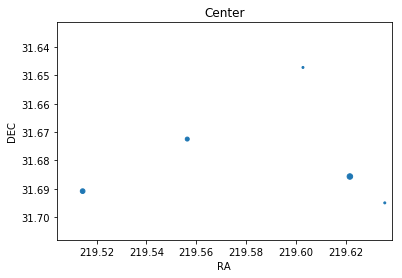

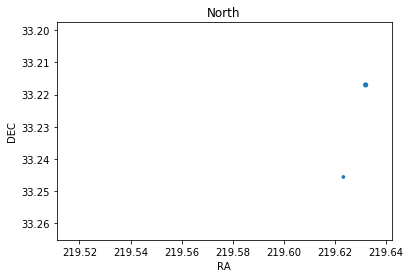

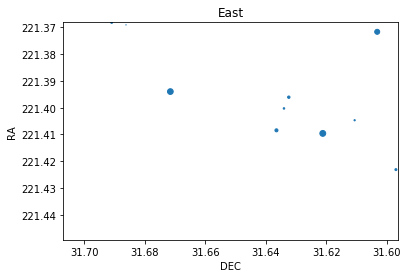

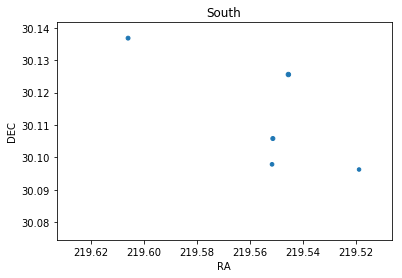

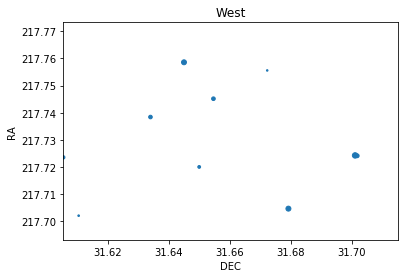

In [4]:
#It could be helpful to actually plot the distribution of stars. This plot the stars in each CCD, in the orientation displayed 
#by the LS CI viewer http://legacysurvey.org/viewer/ci
#below picks the last "good" tile from above
#add items to sel if you want to restrict what gets plotted (e.g., to select only guide stars)
#anything fainter than 18.1 currently gets a negative size
#it only plots objects within the region the CCDs are expected to cover
import fitsio
%pylab inline
tiledir = '/project/projectdirs/desi/cmx/ci/tiles/v6/'
tile = 58804
tilefile = tiledir+'citile-058804.fits'
h = fitsio.read_header(tilefile)
tra = h['TILERA']
tdec = h['TILEDEC']
f = fitsio.read(tilefile)

from select_CItiles import plotcam
locl = [3,2,1,4,5]
for loc in locl:
    sel = (f['GFA_LOC'] == loc) #& (f['IS_GUIDE'] == 1)
    plotcam(loc,f[sel],tra,tdec,tar='TARGET_')